<a href="https://colab.research.google.com/github/theyugster/23CSE211_24252/blob/main/Intro_to_ML(LinearRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ravitejakotharu/salary-datacsv")

print("Path to dataset files:", path)

100%|██████████| 378/378 [00:00<00:00, 884kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ravitejakotharu/salary-datacsv/versions/1


In [ ]:
import os

print(os.listdir(path))

['salary_data.csv']


In [ ]:
data = pd.read_csv(f"{path}/salary_data.csv")

In [ ]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.shape


(30, 2)

In [ ]:
data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
x = data.iloc[:, :1].values
y = data.iloc[:,1:2].values
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([[115790.21011287],
       [ 71498.27809463],
       [102596.86866063],
       [ 75267.80422384],
       [ 55477.79204548],
       [ 60189.69970699]])

In [ ]:
y_test

array([[112635.],
       [ 67938.],
       [113812.],
       [ 83088.],
       [ 64445.],
       [ 57189.]])

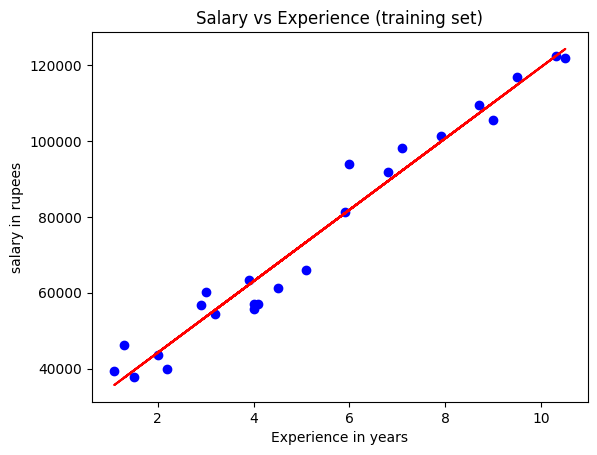

In [ ]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Experience in years')
plt.ylabel('salary in rupees')
plt.show()

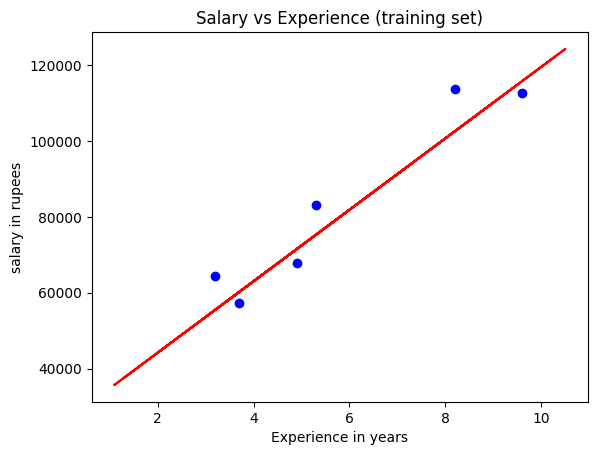

In [ ]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Experience in years')
plt.ylabel('salary in rupees')
plt.show()

In [ ]:
data2 = pd.read_excel('/content/weight-dataset.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/weight-dataset.xlsx'

In [ ]:
data2

In [ ]:
data2['Gender'] = data2['Gender'].replace({'Female': 0, 'Male': 1, 'Ma le': 1})
data2.shape
print(data2['Gender'].unique())

In [ ]:
data2.isnull().sum()

In [ ]:
data2

In [ ]:
x2 = data2.iloc[:, 1:].values
y2 = data2.iloc[:,:1].values
print(x2)
print(y2)

In [ ]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.2,random_state = 42)

In [ ]:
model2 = LinearRegression()

model2.fit(x2_train, y2_train)
y2_pred = model2.predict(x2_test)

In [ ]:
y2_pred

In [ ]:
import numpy as np

# Get the 'Height' feature for plotting (first column of x2_train)
x2_train_height = x2_train[:, 0]

# Scatter plot of actual training data
plt.scatter(x2_train_height, y2_train, color='blue', label='Actual Weight (training)')

# To draw a straight line from the multi-feature model, we fix other features
# Let's take the mean of Age and mode of Gender from the training data
mean_age = x2_train[:, 1].mean()
# Convert to pandas Series to use .mode() and then get the first mode value
mode_gender = pd.Series(x2_train[:, 2].round().astype(int)).mode()[0]

# Create a range of heights for the regression line
height_range = np.linspace(x2_train_height.min(), x2_train_height.max(), 100)

# Create a synthetic dataset for plotting the regression line
# All heights are varied, while Age and Gender are kept constant
regression_line_data = np.array([
    [h, mean_age, mode_gender] for h in height_range
])

# Predict weights for this synthetic data using the trained model
predicted_weights_line = model2.predict(regression_line_data)

# Plot the straight regression line
plt.plot(height_range, predicted_weights_line, color='red', label='Model Prediction (Age=Avg, Gender=Mode)')

plt.title('Weight vs Height (training set)')
plt.xlabel('Height (meters)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:


# Get the 'Height' feature for plotting (first column of x2_test)
x2_test_height = x2_test[:, 0]

# Scatter plot of actual testing data
plt.scatter(x2_test_height, y2_test, color='blue', label='Actual Weight (testing)')

# Use mean_age and mode_gender calculated from training data
# (Already defined in the previous cell if it was executed)
# If not, ensure these are calculated:
# mean_age = x2_train[:, 1].mean()
# mode_gender = pd.Series(x2_train[:, 2].round().astype(int)).mode()[0]

# Create a range of heights for the regression line based on test data range
height_range_test = np.linspace(x2_test_height.min(), x2_test_height.max(), 100)

# Create a synthetic dataset for plotting the regression line for test data
regression_line_data_test = np.array([
    [h, mean_age, mode_gender] for h in height_range_test
])

# Predict weights for this synthetic data using the trained model (model2)
predicted_weights_line_test = model2.predict(regression_line_data_test)

# Plot the straight regression line
plt.plot(height_range_test, predicted_weights_line_test, color='red', label='Model Prediction (Age=Avg, Gender=Mode)')

plt.title('Weight vs Height (testing set)')
plt.xlabel('Height (meters)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
path3 = kagglehub.dataset_download("adelanseur/taxi-trips-chicago-2024")

print("Path to dataset files:", path3)

100%|██████████| 111M/111M [00:03<00:00, 36.1MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adelanseur/taxi-trips-chicago-2024/versions/1


In [ ]:
print(os.listdir(path3))

['Taxi_Trips_-_2024_20240408.csv']


In [ ]:
data3 = pd.read_csv("/root/.cache/kagglehub/datasets/adelanseur/taxi-trips-chicago-2024/versions/1/Taxi_Trips_-_2024_20240408.csv")

In [ ]:
data3 = data3[['Trip Miles','Trip Total']]

In [ ]:
data3.shape

(865247, 2)

In [ ]:
data3.dropna(inplace=True)
data3.isnull().sum()

/tmp/ipython-input-3564650886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.dropna(inplace=True)


,0
Trip Miles,0
Trip Total,0


In [ ]:
data3.head()

,Trip Miles,Trip Total
0,0.09,38.75
1,3.00,12.00
2,5.84,26.70
3,13.36,47.10
4,6.13,22.82


In [ ]:
x3 = data3.iloc[:, :1].values
y3 = data3.iloc[:,1:2].values
print(x3)
print(y3)

[[ 0.09]
 [ 3.  ]
 [ 5.84]
 ...
 [17.44]
 [ 3.07]
 [ 1.49]]
[[38.75]
 [12.  ]
 [26.7 ]
 ...
 [66.3 ]
 [26.  ]
 [12.25]]


In [ ]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size = 0.2,random_state = 42)

In [ ]:
model3 = LinearRegression()

model3.fit(x3_train, y3_train)
y3_pred = model.predict(x3_test)


In [ ]:
model.score(x3_test,y3_test)

0.1719224457128684

In [ ]:
print(y3_test)
print(y3_pred)

[[31.25]
 [24.98]
 [ 8.75]
 ...
 [45.25]
 [43.5 ]
 [50.4 ]]
[[42.1919655 ]
 [28.15969042]
 [12.27758623]
 ...
 [ 9.81995614]
 [48.63994124]
 [48.11141863]]


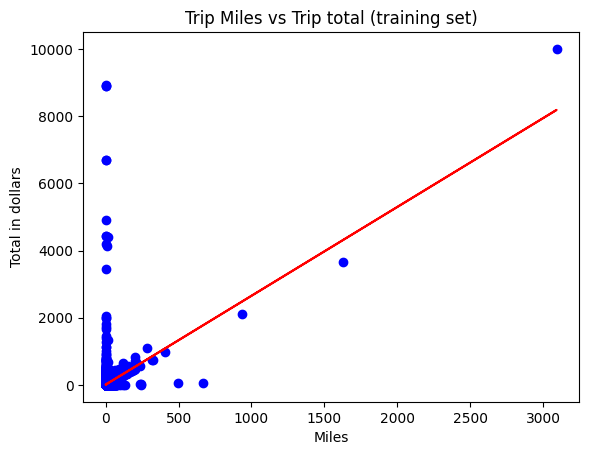

In [ ]:
plt.scatter(x3_train, y3_train, color = 'blue')
plt.plot(x3_train, model.predict(x3_train), color = 'red')
plt.title('Trip Miles vs Trip total (training set)')
plt.xlabel('Miles')
plt.ylabel('Total in dollars')
plt.show()

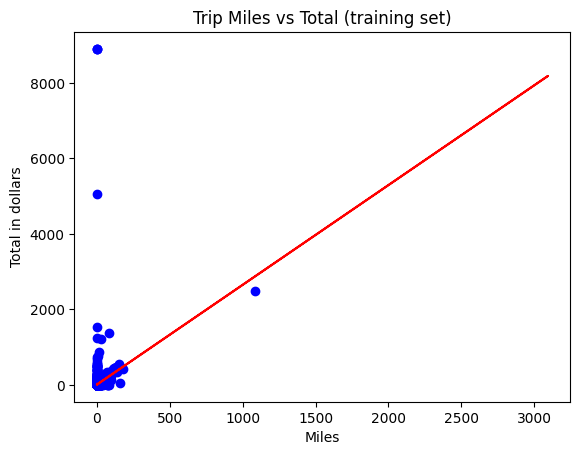

In [ ]:
plt.scatter(x3_test, y3_test, color = 'blue')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.title('Trip Miles vs Total (training set)')
plt.xlabel('Miles')
plt.ylabel('Total in dollars')
plt.show()